In [105]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
# 设置在notebook中直接展示图形输出
# 注意DataFrame也是基于matplotlib作图的
%matplotlib inline 

# 设置图片清晰度
%config InlineBackend.figure_format = 'retina'

## 0.数据集构建

In [87]:
iris=load_iris()
iris.target_names
iris.feature_names
data = pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['type']=iris.target
iris.target_names
data['type_name']=data.type.replace({0:'setosa',1:'versicolor',2:'virginica'})

## 1.数据集概况了解：head, info, decribe ,结果值的value_count ，info

### 1.1初步印象

In [88]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,type_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [89]:
data.shape

(150, 6)

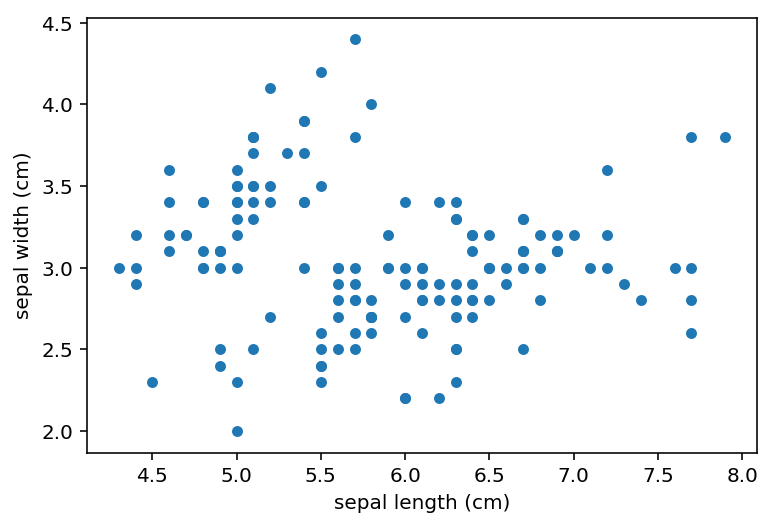

In [90]:
# 观察分布
data.plot(kind='scatter', x="sepal length (cm)", y="sepal width (cm)")

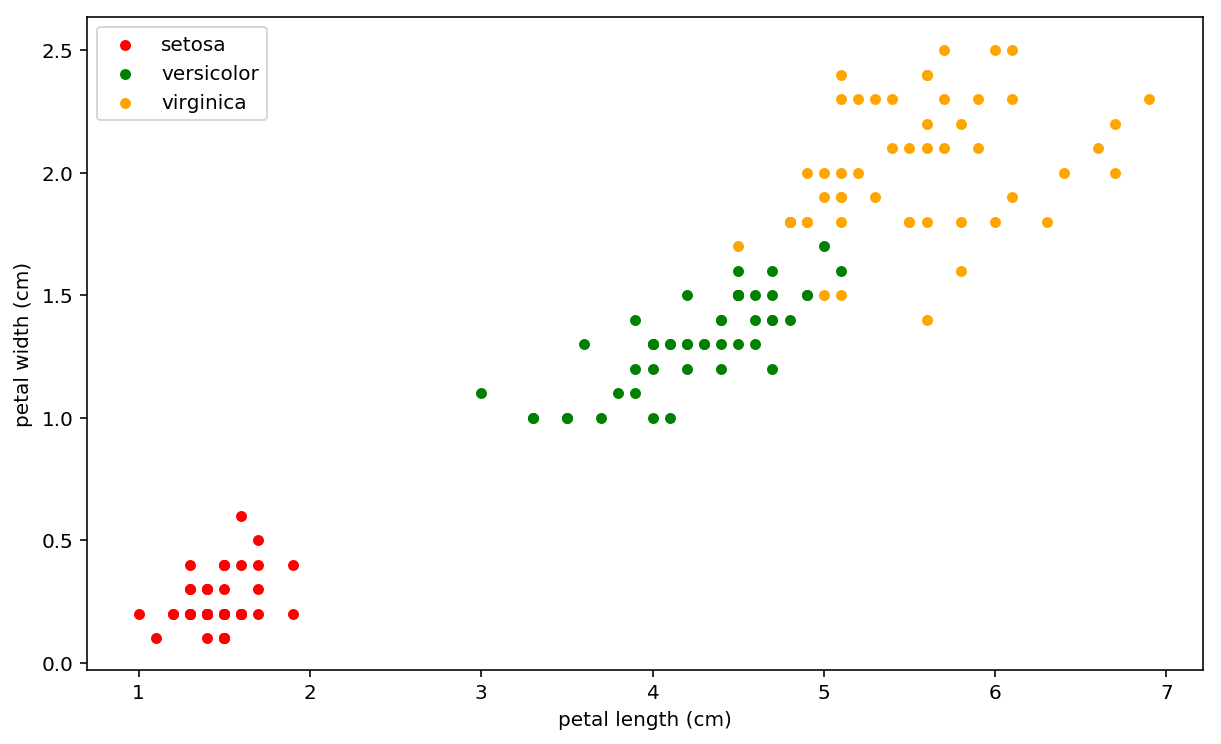

In [91]:
# 使用布尔索引的方法分别获取三个品种的数据，观察不同类型的数据编排
setosa = data[data.type_name == 'setosa']
versicolor = data[data.type_name == 'versicolor']
virginica = data[data.type_name == 'virginica']

ax = setosa.plot(kind='scatter', x="petal length (cm)", y="petal width (cm)", color='Red', label='setosa', figsize=(10,6))
versicolor.plot(kind='scatter', x="petal length (cm)", y="petal width (cm)", color='Green', ax=ax, label='versicolor')
virginica.plot(kind='scatter', x="petal length (cm)", y="petal width (cm)", color='Orange', ax=ax, label='virginica')

In [92]:
data.describe() #结合蜡烛图看数据分布

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FC6ACB470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027FC6E68CF8>]], dtype=object)

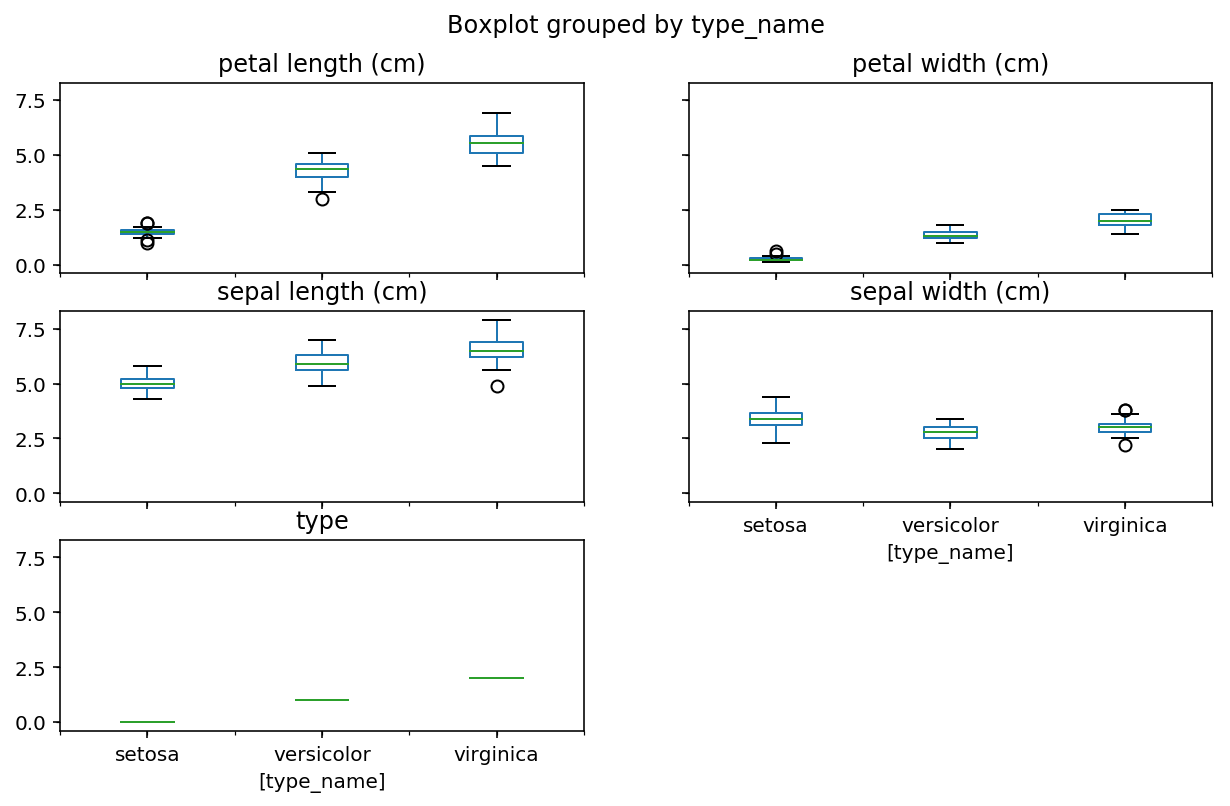

In [93]:
data.boxplot(by='type_name', grid=False, figsize=(10, 6))
#data[['sepal length (cm)', 'type']].boxplot(grid=False, by='type', figsize=(10, 6)) #查看单列

In [94]:
data.info()# 看非空值等等

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
type                 150 non-null int32
type_name            150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


### 1.2 相关性分析

In [95]:
correlation = data[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]].corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


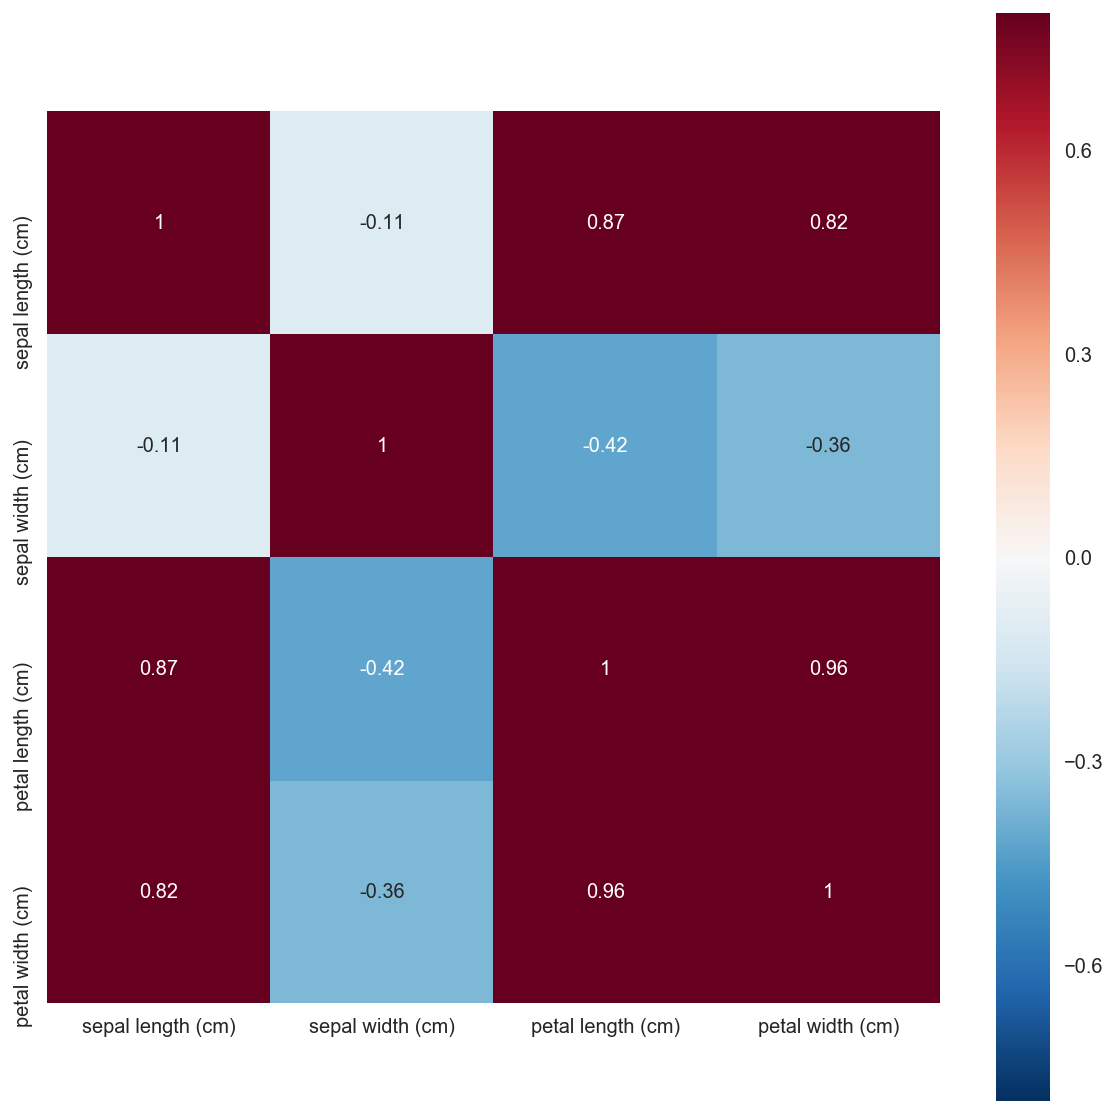

In [106]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(correlation, vmax=.8, square=True, annot=True)

### 1.3 查看结果集

In [96]:
# 结果y的分类  可以再加个柱状图
data.type_name.value_counts()

versicolor    50
virginica     50
setosa        50
Name: type_name, dtype: int64

In [97]:
# 结果y的description
data.type_name.describe()
#data.type_name.unique

count            150
unique             3
top       versicolor
freq              50
Name: type_name, dtype: object

## 2.Group分组

In [98]:
group=data.groupby('type_name')

### 2.1聚合函数

In [99]:
# 首先自定义一个函数
def range_iris(arr):
    return arr.max() - arr.min()

In [100]:
group.agg(['sum','max','size',range_iris])

sepal length (cm)                      sepal width (cm)            \
                         sum  max size range_iris              sum  max size   
type_name                                                                      
setosa                 250.3  5.8   50        1.5            170.9  4.4   50   
versicolor             296.8  7.0   50        2.1            138.5  3.4   50   
virginica              329.4  7.9   50        3.0            148.7  3.8   50   

                      petal length (cm)                      petal width (cm)  \
           range_iris               sum  max size range_iris              sum   
type_name                                                                       
setosa            2.1              73.2  1.9   50        0.9             12.2   
versicolor        1.4             213.0  5.1   50        2.1             66.3   
virginica         1.6             277.6  6.9   50        2.4            101.3   

                                type                      
            max size range_iris  sum max size range_iris  
type_name                                                 
setosa      0.6   50        0.5    0   0   50          0  
versicolor  1.8   50        0.8   50   1   50          0  
virginica   2.5   50        1.1  100   2   50          0

### 2.2 apply单独返回矢量

In [101]:
# 可以定义函数：返回一个DataFrame的前n个值
def first_n(df, n = 3):
    return(df[0:n])

In [102]:
group.apply(first_n,5)

sepal length (cm)  sepal width (cm)  petal length (cm)  \
type_name                                                                
setosa     0                  5.1               3.5                1.4   
           1                  4.9               3.0                1.4   
           2                  4.7               3.2                1.3   
           3                  4.6               3.1                1.5   
           4                  5.0               3.6                1.4   
versicolor 50                 7.0               3.2                4.7   
           51                 6.4               3.2                4.5   
           52                 6.9               3.1                4.9   
           53                 5.5               2.3                4.0   
           54                 6.5               2.8                4.6   
virginica  100                6.3               3.3                6.0   
           101                5.8               2.7                5.1   
           102                7.1               3.0                5.9   
           103                6.3               2.9                5.6   
           104                6.5               3.0                5.8   

                petal width (cm)  type   type_name  
type_name                                           
setosa     0                 0.2     0      setosa  
           1                 0.2     0      setosa  
           2                 0.2     0      setosa  
           3                 0.2     0      setosa  
           4                 0.2     0      setosa  
versicolor 50                1.4     1  versicolor  
           51                1.5     1  versicolor  
           52                1.5     1  versicolor  
           53                1.3     1  versicolor  
           54                1.5     1  versicolor  
virginica  100               2.5     2   virginica  
           101               1.9     2   virginica  
           102               2.1     2   virginica  
           103               1.8     2   virginica  
           104               2.2     2   virginica

## 3 简单拟合

### 3.1

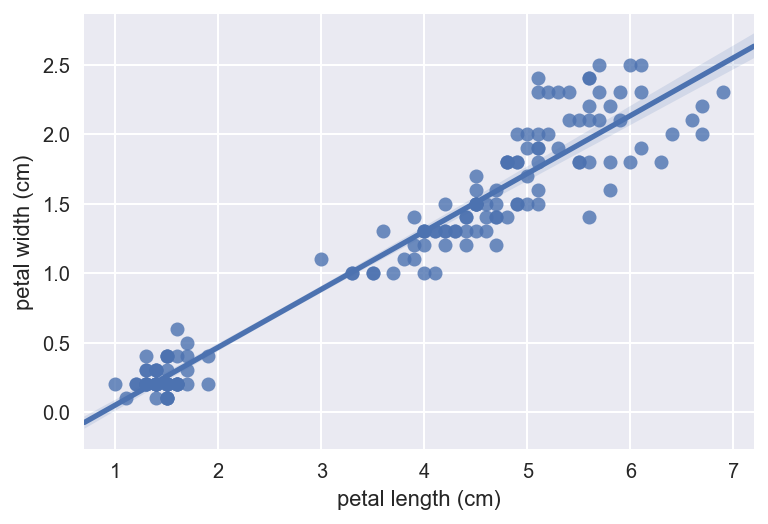

In [107]:
sns.regplot(x="petal length (cm)", y="petal width (cm)", data=data)